In [31]:
from matplotlib import pyplot as plt
%matplotlib notebook
from matplotlib import animation
import numpy as np

In [32]:
#make a fake galaxy distribution from a MOG
mean1, std1 = (np.random.rand()*2-1, np.random.rand()*2-1), (np.random.rand()*3+0.5, np.random.rand()*3+0.5)
mean2, std2 = (np.random.rand()*2+1, np.random.rand()*2+1), (np.random.rand()*3+0.5, np.random.rand()*3+0.5)
N1, N2 = 500, 500
points = np.zeros((N1+N2, 2))

points[:N1] = np.random.randn(N1, 2)*np.array(std1)+np.array(mean1)
points[N1:] = np.random.randn(N2, 2)*np.array(std2)+np.array(mean2)

<IPython.core.display.Javascript object>


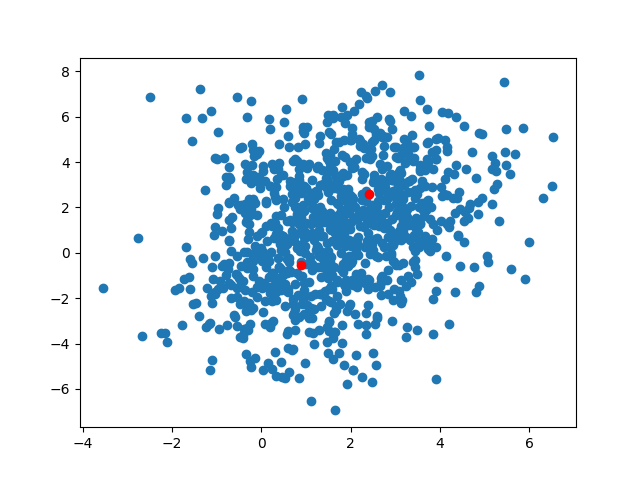

In [33]:
plt.scatter(points[:,0], points[:,1])
plt.scatter(mean1[0], mean1[ 1], color = 'r')
plt.scatter(mean2[0], mean2[1], color = 'r')

In [34]:
from itertools import combinations

In [35]:
random_points = np.random.randn(N1+N2, 2)*5
pairs = list(combinations(range(random_points.shape[0]), 2) )
n_bins = 10

hist_bins = np.logspace(-1, 1, n_bins+1)
hbc = (hist_bins[1:]+hist_bins[:-1])/2.0

dists = np.zeros(( len(pairs), ))

for i, pair in enumerate(pairs):
    p1, p2 = pairs[i][0], pairs[i][1]
    x1, y1 = random_points[p1]
    x2, y2 = random_points[p2]
    dists[i] = np.sqrt((x2-x1)**2+(y2-y1)**2)
    
random_hist, _ = np.histogram(dists, bins=hist_bins)
random_hist[random_hist==0] = 1e-3

<IPython.core.display.Javascript object>


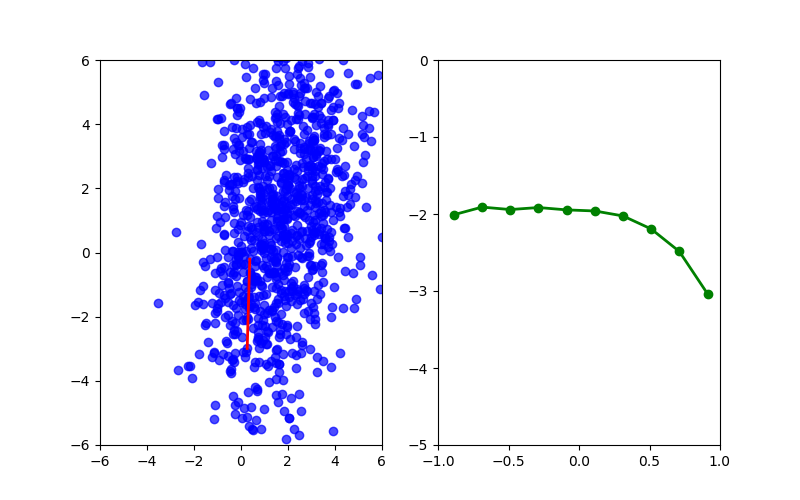

In [37]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = (8, 5))
ax1 = plt.subplot(1, 2, 1, xlim=(-6, 6), ylim=(-6, 6))
ax2 = plt.subplot(1, 2, 2, xlim=(-1, 1), ylim = (-5, 0))
pairs = list(combinations(range(points.shape[0]), 2) ) 
np.random.shuffle(pairs)
dist_counts = np.zeros((len(pairs),))

line1, = ax1.plot([], [], lw=2, color = 'r')
line2, = ax2.plot([], [], lw = 2, color = 'g', marker = 'o')

# initialization function: plot the background of each frame
def init():
    ax1.scatter(points[:,0], points[:,1], color = 'b', alpha = 0.7)
    return line1, line2

# animation function.  This is called sequentially
def animate(i):
    p1, p2 = pairs[i][0], pairs[i][1]
    x1, y1 = points[p1]
    x2, y2 = points[p2]
    x = np.linspace(x1, x2, 100)
    y = np.linspace(y1, y2, 100)
    line1.set_data(x, y)
    dist_counts[i] = np.sqrt((x2-x1)**2+(y2-y1)**2)
    data_hist = np.histogram(dist_counts[:i], bins = hist_bins)[0].astype(float)
    data_hist = data_hist*(N1+N2)/(i+1) # reweight
    data_hist[data_hist == 0] = data_hist[data_hist==0]+ 1e-3
    #print np.log10(data_hist /random_hist)
    line2.set_data(np.log10(hbc), np.log10(data_hist/random_hist ))
    return line1, line2

# call the animator.  blit=True means only re-draw the parts that have changed.
#for i in xrange(100):
#    animate(i)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50000, interval=1, blit=True)#, repeat = False)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

#ax2.xlabel('Log r')
#ax2.ylabel('Log Xi')
#ax1.xlabel('x')
#ax2.ylabel('y')
plt.show()